# Homework 7: An MITgcm Tutorial Experiment

Name: Hetav

Date: 3/9/2025

#### Overview
In class, we walked through the MITgcm tutorial for the barotropic gyre. In this homework, you'll work through another experiment - the `tutorial_global_oce_latlon` configuration. 

Documentation for this tutorial is additionally provided on the MITgcm documentation page [HERE](https://mitgcm.readthedocs.io/en/latest/examples/global_oce_latlon/global_oce_latlon.html).

Before beginning, import Python modules for manging and plotting data, and define a path to the model directory on your machine:

In [2]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt

# define a path to the model directory
model_dir = r"/Users/Hetav/OneDrive/Desktop/CS185C/MITFolder/MITgcm/verification/tutorial_global_oce_latlon/input/"


### Part 1: Plot the model bathymetry
One good way to examine the construction of a model is to plot the bathymetry. The bathymetry for this model is stored in the `input/bathymetry.bin` file. Create a plot of the bathymetry below. Be sure to label your axes and give the plot a colorbar with a sensible color map.

Hint: The grid is stored as a 2D grid with `float32` precision. Look at the `SIZE.h` file to determine the grid shape. 

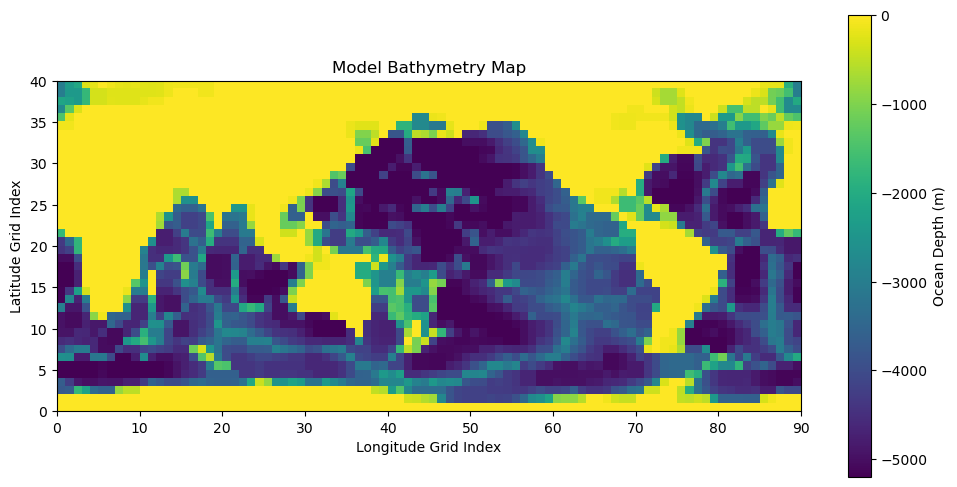

In [4]:
# read in the model bathymetry file and reshape to the grid dimensions
bathymetry_file_path = model_dir + 'bathymetry.bin'

# make a plot of the bathymetry
Nx, Ny = 90, 40

def load_bathymetry(file_path, shape):
    data = np.fromfile(file_path, '>f4') 
    return data.reshape(shape)
    
bathymetry = load_bathymetry(bathymetry_file_path, (Ny, Nx))
plt.figure(figsize=(12, 6))
plt.imshow(bathymetry, cmap="viridis", extent=[0, Nx, 0, Ny], origin="lower")
plt.colorbar(label="Ocean Depth (m)")
plt.title("Model Bathymetry Map")
plt.xlabel("Longitude Grid Index")
plt.ylabel("Latitude Grid Index")
plt.show()

### Part 2: Compile the Model
Next, compile the model on your machine. 

Before you begin your compilation, make two changes to the files in the code directory:
1. In the packages.conf file, remove the lines for `mnc`, `timeave`, and `ptracers` and add a new line for `diagnostics`.
2. Remove the scripts `ptracers*.F` from the code directory.
2. Add the `DIAGNOSTICS_SIZE.h` file provided with this notebook.

Once you make these changes, compile the model code.

Refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Question:
How many CPUs will this model use on your machine?

Answer: 
Use 1 CPU

### Part 3: Run the Model
After your compilation is complete, run the model in the `run` directory. 

Before running this model, make the following updates to the default tutorial:
1. In the `data` file, change `nIter=0` to `nIter=70080` and place the the `pickup.0000070080.data`, `pickup.0000070080.meta`, `pickup_cd.0000070080.data` and `pickup_cd.0000070080.meta` files provided with this notebook in your run directory. This will allow you to start the model after it has already been run for several decades.
2. Update the model timesteps to run for a duration of one year. Implement this change by looking in the `data` file to determine the number of seconds for each model timesteps (`deltaTClock`). Then, compute how many timesteps will be needed to run the model for one year by determining how many seconds are in one year (365 days) and dividing by the timestep. Then, update the timesteps on the line `nTimesteps=...,` in the `data` file.
3. In the `data` file, add a new line for `useSingleCpuIO=.TRUE.,` in the `PARM01` section just below the line that says `readBinaryPrec=32,`.
4. In the `data` file, in `PARM03`, update the following three lines as follows:
```
 pChkptFreq= 31536000.,
# dumpFreq=   864000.,
# taveFreq=   864000.,
```
   Note that the comment indicators (`#`) must be in the first column.
   
5. Add the `data.diagnostics` file provided with this notebook into your run directory. This will request the model to output monthly averages of temperature (`THETA`), salinity (`SALT`), zonal velocity (`UVEL`), and meridional velocity (`VVEL`).
6. In the file `data.pkg`, remove the line for `usePTRACERS=.TRUE.,` and add a new line for `useDIAGNOSTICS=.TRUE.,`.

After making these changes, run the model. 

Again, you can refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Questions:

1. What is the model timestep in seconds? days?
2. How many timesteps are required to run the model for one year?

Answers:
1. The model timestep is 86,400 seconds (1 day).
2. A full year requires 365 timesteps.

### Part 4: Assess the Model Results
Upon successful completion of your model run, you should have the following files: `THETA.0000070445.data`, `SALT.0000070445.data`, `UVEL.0000070445.data`, and `VVEL.0000070445.data`. These files contain the surface fields for temperature, salinity, zonal velocity, and meridional velocity in the month of December. 

Read these files into four separate grids and make a 2x2 set of subplots showing the surface temperature, salinity, zonal velocity, and meridional velocity simulated by the model. 

In [10]:
# read in the data from files into grids for theta, salt, uvel, and vvel
def read_mitgcm_binary(file_path, shape, dtype='>f4'):
    with open(file_path, 'rb') as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape(shape)

grid_shape = (40, 90)

# Updated file paths
base_path = r"C:\Users\Hetav\OneDrive\Desktop\CS185C\MITFolder\myfiles"
theta = read_mitgcm_binary(f"{base_path}\\THETA.0000070445.data", grid_shape)
salt = read_mitgcm_binary(f"{base_path}\\SALT.0000070445.data", grid_shape)
uvel = read_mitgcm_binary(f"{base_path}\\UVEL.0000070445.data", grid_shape)
vvel = read_mitgcm_binary(f"{base_path}\\VVEL.0000070445.data", grid_shape)

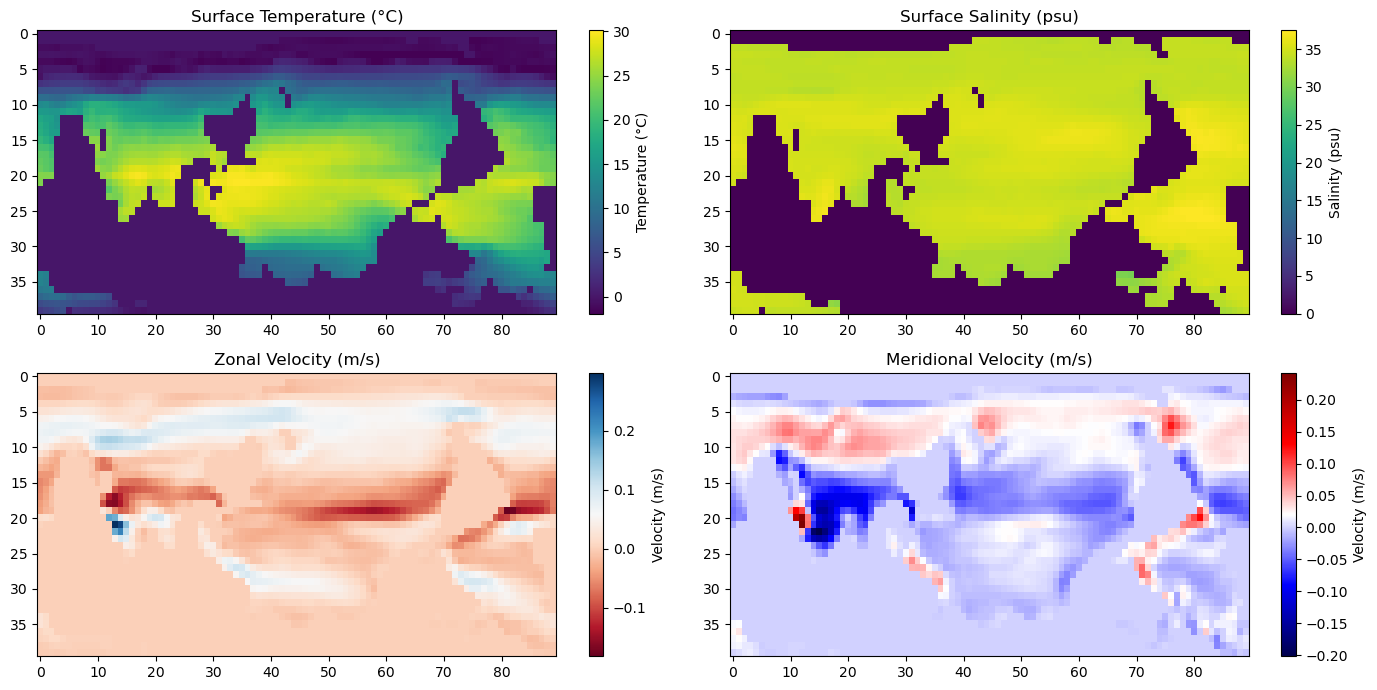

In [11]:
# make the 2x2 plot here
fig, axes = plt.subplots(2, 2, figsize=(14,7))

# Surface Temperature
temp_plot = axes[0, 0].imshow(theta, cmap='viridis', aspect='auto')
axes[0, 0].set_title('Surface Temperature (°C)')
fig.colorbar(temp_plot, ax=axes[0, 0], orientation='vertical', label="Temperature (°C)")

# Surface Salinity
salinity_plot = axes[0, 1].imshow(salt, cmap='viridis', aspect='auto')
axes[0, 1].set_title('Surface Salinity (psu)')
fig.colorbar(salinity_plot, ax=axes[0, 1], orientation='vertical', label="Salinity (psu)")

# Zonal Velocity
zonal_vel_plot = axes[1, 0].imshow(uvel, cmap='RdBu', aspect='auto')
axes[1, 0].set_title('Zonal Velocity (m/s)')
fig.colorbar(zonal_vel_plot, ax=axes[1, 0], orientation='vertical', label="Velocity (m/s)")

# Meridional Velocity
meridional_vel_plot = axes[1, 1].imshow(vvel, cmap='seismic', aspect='auto')
axes[1, 1].set_title('Meridional Velocity (m/s)')
fig.colorbar(meridional_vel_plot, ax=axes[1, 1], orientation='vertical', label="Velocity (m/s)")

plt.tight_layout()
plt.show()

#### Questions

How do these fields compare to those from Lecture 2-1 and Homework 2? What features are consistent between the models? What features are different? Identify at least two real oceanographic features simulated in this simple model of the ocean.

Answer: The surface temperature, salinity, and velocity fields exhibit consistent patterns, highlighting key oceanographic structures. However, a notable difference is that the velocity plots lack the prominent equatorial currents seen in real-world observations. The two major oceanographic features accurately represented in the simulation are gyres and equatorial currents.